In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

batch_size = 512
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4422102/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Create a new Sequential model with Sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Conv2D(32, (3, 3), padding='same',
              input_shape=x_train.shape[1:]))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(32, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Conv2D(64, (3, 3), padding='same'))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(64, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(512))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(num_classes))
model_sigmoid.add(Activation('softmax'))

In [ ]:
# Create a new Sequential model with Leaky ReLU activation(alpha=0.1)
model_leakyrelu = Sequential()
model_leakyrelu.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(Conv2D(32, (3, 3)))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(MaxPooling2D(pool_size=(2, 2)))
model_leakyrelu.add(Dropout(0.25))

model_leakyrelu.add(Conv2D(64, (3, 3), padding='same'))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(Conv2D(64, (3, 3)))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(MaxPooling2D(pool_size=(2, 2)))
model_leakyrelu.add(Dropout(0.25))

model_leakyrelu.add(Flatten())
model_leakyrelu.add(Dense(512))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(Dropout(0.5))
model_leakyrelu.add(Dense(num_classes))
model_leakyrelu.add(LeakyReLU(alpha=0.1))
model_leakyrelu.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Create a new Sequential model with Leaky ReLU activation(alpha=0.2)
model_leakyrelu2 = Sequential()
model_leakyrelu2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_leakyrelu2.add(LeakyReLU(alpha=0.1))
model_leakyrelu2.add(Conv2D(32, (3, 3)))
model_leakyrelu2.add(LeakyReLU(alpha=0.2))
model_leakyrelu2.add(MaxPooling2D(pool_size=(2, 2)))
model_leakyrelu2.add(Dropout(0.25))

model_leakyrelu2.add(Conv2D(64, (3, 3), padding='same'))
model_leakyrelu2.add(LeakyReLU(alpha=0.2))
model_leakyrelu2.add(Conv2D(64, (3, 3)))
model_leakyrelu2.add(LeakyReLU(alpha=0.2))
model_leakyrelu2.add(MaxPooling2D(pool_size=(2, 2)))
model_leakyrelu2.add(Dropout(0.25))

model_leakyrelu2.add(Flatten())
model_leakyrelu2.add(Dense(512))
model_leakyrelu2.add(LeakyReLU(alpha=0.2))
model_leakyrelu2.add(Dropout(0.5))
model_leakyrelu2.add(Dense(num_classes))
model_leakyrelu2.add(LeakyReLU(alpha=0.2))
model_leakyrelu2.add(Dense(num_classes, activation='softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_sigmoid.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_leakyrelu.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_leakyrelu2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
  print('Not using data augmentation.')
  history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
  history_sigmoid=model_sigmoid.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
  history_leakyrelu=model_leakyrelu.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
  history_leakyrelu2=model_leakyrelu2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)
  history_sigmoid = model_sigmoid.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)
  history_leakyrelu = model_leakyrelu.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)
  history_leakyrelu2 = model_leakyrelu2.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, 'keras_fashionmnist_trained_model_ReLU.h5')
model.save(model_path)
#print('Saved trained model at %s ' % model_path)
model_sigmoid_path = os.path.join(save_dir, 'keras_fashionmnist_trained_model_sigmoid.h5')
model_sigmoid.save(model_sigmoid_path)

model_leakyrelu_path = os.path.join(save_dir, 'keras_fashionmnist_trained_model_leakyReLU.h5')
model_leakyrelu.save(model_leakyrelu_path)

model_leakyrelu2_path = os.path.join(save_dir, 'keras_fashionmnist_trained_model_leakyReLU2.h5')
model_leakyrelu2.save(model_leakyrelu2_path)



Using real-time data augmentation.
Epoch 1/30
118/118 [==============================] - 41s 232ms/step - loss: 1.5409 - accuracy: 0.4342 - val_loss: 0.8872 - val_accuracy: 0.6995
Epoch 2/30
118/118 [==============================] - 30s 248ms/step - loss: 1.0127 - accuracy: 0.6312 - val_loss: 0.7515 - val_accuracy: 0.7270
Epoch 3/30
118/118 [==============================] - 28s 229ms/step - loss: 0.8665 - accuracy: 0.6806 - val_loss: 0.6846 - val_accuracy: 0.7496
Epoch 4/30
118/118 [==============================] - 28s 229ms/step - loss: 0.7955 - accuracy: 0.7042 - val_loss: 0.6722 - val_accuracy: 0.7408
Epoch 5/30
118/118 [==============================] - 28s 233ms/step - loss: 0.7437 - accuracy: 0.7194 - val_loss: 0.6146 - val_accuracy: 0.7649
Epoch 6/30
118/118 [==============================] - 30s 245ms/step - loss: 0.7105 - accuracy: 0.7300 - val_loss: 0.5898 - val_accuracy: 0.7787
Epoch 7/30
118/118 [==============================] - 27s 227ms/step - loss: 0.6826 - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('ReLU CNN')
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

scores_sigmoid = model_sigmoid.evaluate(x_test, y_test, verbose=1)
print('Sigmoid CNN')
print('Test loss:', scores_sigmoid[0])
print('Test accuracy:', scores_sigmoid[1])

scores_leakyrelu = model_leakyrelu.evaluate(x_test, y_test, verbose=1)
print('Leaky ReLU CNN alpha=0.1')
print('Test loss:', scores_leakyrelu[0])
print('Test accuracy:', scores_leakyrelu[1])

scores_leakyrelu2 = model_leakyrelu2.evaluate(x_test, y_test, verbose=1)
print('Leaky ReLU CNN alpha=0.2')
print('Test loss:', scores_leakyrelu2[0])
print('Test accuracy:', scores_leakyrelu2[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.3434 - accuracy: 0.8718
ReLU CNN
Test loss: 0.343449205160141
Test accuracy: 0.8718000054359436
313/313 [==============================] - 3s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Sigmoid CNN
Test loss: 2.302600860595703
Test accuracy: 0.10000000149011612
313/313 [==============================] - 3s 9ms/step - loss: 0.3952 - accuracy: 0.8524
Leaky ReLU CNN alpha=0.1
Test loss: 0.3951701521873474
Test accuracy: 0.852400004863739
313/313 [==============================] - 3s 8ms/step - loss: 0.4097 - accuracy: 0.8487
Leaky ReLU CNN alpha=0.2
Test loss: 0.4096507728099823
Test accuracy: 0.8486999869346619


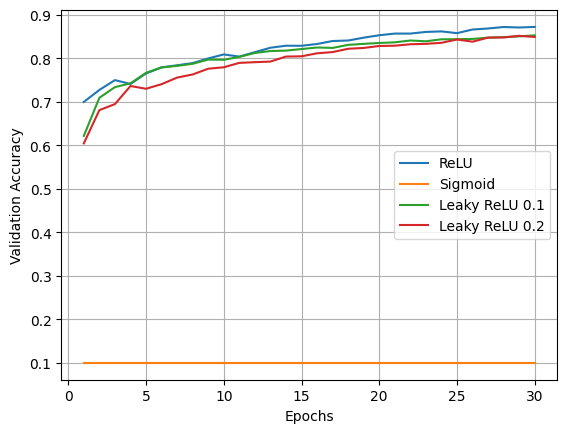

In [ ]:
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, history.history['val_accuracy'], label='ReLU')
plt.plot(epochs_range, history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(epochs_range, history_leakyrelu.history['val_accuracy'], label='Leaky ReLU 0.1')
plt.plot(epochs_range, history_leakyrelu2.history['val_accuracy'], label='Leaky ReLU 0.2')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()